In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("votegetters_withratios.csv")
data.columns = [c.replace(' ', '_') for c in data.columns]

share = np.array(data.Share)

show = data.loc[0:,'G':'WS/48']
show = pd.concat([show, data['Win_Ratio']], 1)
show

,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Win_Ratio
0,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,0.731707
1,78,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,0.719512
2,78,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,0.500000
3,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,0.743902
4,80,35.8,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,0.743902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,0.472222
681,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,0.680556
682,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,0.704545
683,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,0.583333


In [54]:
x_c1_temp = data[data['MVP']==1]
x_c2_temp = data[data['MVP']==-1]

x_c1 = x_c1_temp.loc[0:, 'G':'WS/48']
x_c1 = pd.concat([x_c1, x_c1_temp['Win_Ratio']], 1)

x_c2 = x_c2_temp.loc[0:, 'G':'WS/48']
x_c2 = pd.concat([x_c2, x_c2_temp['Win_Ratio']], 1)

x_c1 = x_c1.to_numpy()
x_c2 = x_c2.to_numpy()

In [55]:
n_sample_c1 = len(x_c1)
n_sample_c2 = len(x_c2)

x_c1 = np.hstack((np.ones((n_sample_c1,1)), x_c1))
x_c2 = np.hstack((np.ones((n_sample_c2,1)), x_c2))

x_cols = x_c1.shape[1]

y1 = np.ones((n_sample_c1, 1))
y2 = np.ones((n_sample_c2, 1))*-1

x = np.append(x_c1, x_c2, axis=0)
y = np.append(y1, y2, axis=0)

yx = np.tile(y, (1,x_cols)) * x

w = np.random.rand(1,14)
eta = 0.001
n_epoch = 3000

print("Weights:",w)

Weights: [[0.24511124 0.73433262 0.46342506 0.99580295 0.7056761  0.04151011
  0.86178031 0.97234024 0.0477724  0.58654897 0.99632576 0.34914014
  0.78293484 0.81087656]]


----- Perceptron_mis_yx() started -----
617 42 42 42 42 42 42 42 42 42 42 42 42 42 42 617 42 42 42 42 42 42 42 42 42 42 42 42 42 42 617 42 42 42 42 42 42 42 42 42 42 42 42 42 43 617 42 42 42 42 42 42 42 42 42 42 42 42 42 65 43 609 42 42 42 42 42 42 42 42 42 42 42 42 42 103 42 42 219 42 42 42 42 42 452 42 42 42 42 42 42 42 42 42 42 303 42 42 42 42 42 42 42 550 42 42 42 42 42 42 42 42 42 42 42 42 226 42 42 42 42 42 221 42 42 42 42 42 327 42 42 42 42 42 42 42 80 42 37 294 42 42 42 42 42 42 35 193 42 42 42 42 56 42 288 42 42 42 42 42 42 40 102 42 42 100 42 42 176 42 42 42 42 223 42 42 42 42 42 214 42 42 42 42 42 398 42 42 42 42 42 42 42 42 42 341 42 42 42 42 42 42 42 36 162 42 42 42 37 226 42 42 42 42 42 150 42 42 42 40 54 42 301 42 42 42 42 42 42 36 208 42 42 42 42 37 202 42 42 42 42 36 134 42 42 42 192 42 42 42 42 65 42 86 42 40 272 42 42 42 42 42 42 139 42 42 42 112 42 42 39 89 42 40 265 42 42 42 42 42 42 215 42 42 42 42 40 257 42 42 42 42 42 37 163 42 42 42 33 149 

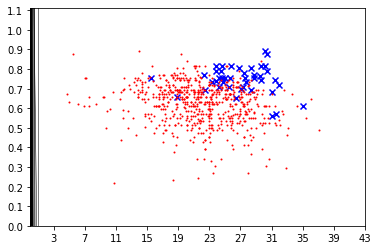

In [38]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    x_c1 = x[0:n_sample_c1, :]
    x_c2 = x[n_sample_c1:len(x), :]
    x_cols = x_c1.shape[1]
    yx = np.tile(y, (1,x_cols)) * x
    
    figure = plt.figure()
    plt.xlim((0,43))
    plt.xticks(np.linspace(3,43,11))
    plt.yticks(np.linspace(0,1.2,13))
    plt.ylim((0,1.11))
    plt.scatter(x_c1[:,3], x_c1[:,13], c="b", marker="x")
    plt.scatter(x_c2[:,3], x_c2[:,13], c='r', s=1)
    print("----- Perceptron_mis_yx() started -----")
    for e in range(0,n_epoch):
        wyx = np.dot(np.tile(w, (n_sample_c1+n_sample_c2, 1)), yx.T)[0]
        yx_misclassified = yx[wyx < 0, :]
        w = w + sum(yx_misclassified)
        
        err = sum(wyx < 0)
        print(err, end=" ")
        x1 = np.linspace(0,59,2)
        x2 = (-w[0][3]*x1 - w[0][0])/w[0][13]
        plt.plot(x1, x2, c="k", marker="", linewidth=0.5)
        
        if err == 0:
            break;
    return e

ret1 = Perceptron_mis_yx(y, x, w, 300, eta)

In [56]:
random_indices = np.random.choice(n_sample_c2, size=42, replace=False)
print(x_c2.shape)
x_c2 = x_c2[random_indices, :]
print(x_c2.shape)

n_sample_c1 = len(x_c1)
n_sample_c2 = len(x_c2)

#x_c1 = np.hstack((np.ones((n_sample_c1,1)), x_c1))
#x_c2 = np.hstack((np.ones((n_sample_c2,1)), x_c2))

x_cols = x_c1.shape[1]

y1 = np.ones((n_sample_c1, 1))
y2 = np.ones((n_sample_c2, 1))*-1

x = np.append(x_c1, x_c2, axis=0)
y = np.append(y1, y2, axis=0)

yx = np.tile(y, (1,x_cols)) * x

w = np.random.rand(1,14)
eta = 0.001
n_epoch = 3000

print("Weights:",w)

(643, 14)
(42, 14)
Weights: [[0.70818505 0.59634013 0.03338331 0.51320305 0.55892887 0.9524058
  0.72431054 0.60871778 0.96189506 0.66224383 0.36851011 0.42753958
  0.44488961 0.58729559]]


----- Perceptron_mis_yx() started -----
40 42 40 42 40 42 40 42 40 42 40 42 40 42 40 42 40 29 40 42 40 42 40 42 40 13 18 42 40 42 40 35 40 42 40 28 40 42 40 42 40 42 40 25 40 42 40 42 40 42 40 41 40 28 40 42 40 42 40 40 40 28 40 42 40 42 40 37 40 41 40 28 40 42 40 42 40 35 40 42 40 32 39 42 40 38 40 38 40 37 40 38 40 38 40 35 39 41 40 32 38 42 39 31 36 41 39 32 36 39 39 35 38 38 38 31 36 41 38 29 36 42 38 30 36 41 38 30 34 38 36 28 33 38 36 28 32 38 36 27 31 37 36 28 31 38 36 30 31 35 35 34 34 32 32 34 34 33 33 33 32 31 31 32 31 30 30 32 31 30 30 31 30 30 29 28 27 28 27 27 28 27 28 28 28 27 28 28 28 27 28 28 28 28 28 27 28 28 28 27 28 28 28 27 28 27 26 29 26 28 26 29 26 28 26 29 26 28 26 29 26 29 28 28 28 27 28 28 28 27 28 27 26 28 28 27 26 28 27 27 27 28 27 27 27 28 27 27 27 28 27 27 27 28 27 27 27 28 27 27 27 28 26 27 27 27 26 27 27 27 27 27 27 28 26 27 27 27 26 28 27 28 26 28 27 28 27 27 26 27 27 28 26 27 27 27 26 28 26 26 

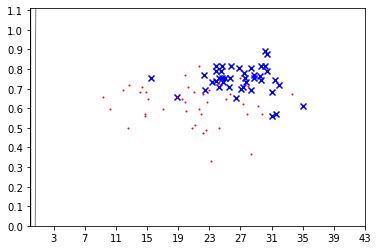

In [57]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    x_c1 = x[0:n_sample_c1, :]
    x_c2 = x[n_sample_c1:len(x), :]
    x_cols = x_c1.shape[1]
    yx = np.tile(y, (1,x_cols)) * x
    
    figure = plt.figure()
    plt.xlim((0,43))
    plt.xticks(np.linspace(3,43,11))
    plt.yticks(np.linspace(0,1.2,13))
    plt.ylim((0,1.11))
    plt.scatter(x_c1[:,3], x_c1[:,13], c="b", marker="x")
    plt.scatter(x_c2[:,3], x_c2[:,13], c='r', s=1)
    print("----- Perceptron_mis_yx() started -----")
    for e in range(0,n_epoch):
        wyx = np.dot(np.tile(w, (n_sample_c1+n_sample_c2, 1)), yx.T)[0]
        yx_misclassified = yx[wyx < 0, :]
        w = w + sum(yx_misclassified)
        
        err = sum(wyx < 0)
        print(err, end=" ")
        x1 = np.linspace(0,59,2)
        x2 = (-w[0][3]*x1 - w[0][0])/w[0][13]
        plt.plot(x1, x2, c="k", marker="", linewidth=0.5)
        
        if err == 0:
            break;
    return e

ret2 = Perceptron_mis_yx(y, x, w, 300, eta)

In [45]:
x_c2.shape

(42, 15)